In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [2]:
%matplotlib widget

In [3]:
folder = "../../Deidentified-Raw-Waveforms/"
coldict = {
    "raw_waves_data_1a.csv": ["time", "257"], "raw_waves_data_1b.csv": ["time", "257", "258"], "raw_waves_data_1c.csv": ["time", "257", "258"], "raw_waves_data_1d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_1e.csv": ["time", "258"],

    "raw_waves_data_2a.csv": ["time", "257", "258"], "raw_waves_data_2b.csv": ["time", "258"], "raw_waves_data_2c.csv": ["time", "257"], "raw_waves_data_2d.csv": ["time", "257", "258"], 
    "raw_waves_data_2e.csv": ["time", "257", "258"],

    "raw_waves_data_3a.csv": ["time", "258"], "raw_waves_data_3b.csv": ["time", "258"], "raw_waves_data_3c.csv": ["time", "258"], "raw_waves_data_3d.csv": ["time", "258"], 
    "raw_waves_data_3e.csv": ["time", "257", "258", "317"],

    "raw_waves_data_4a.csv": ["time", "257", "258"], "raw_waves_data_4b.csv": ["time", "257", "258"], "raw_waves_data_4c.csv": ["time", "257"], "raw_waves_data_4d.csv": ["time", "257", "258"], 
    "raw_waves_data_4e.csv": ["time", "257", "258"],

    "raw_waves_data_5a.csv": ["time", "258"], "raw_waves_data_5b.csv": ["time", "258"], "raw_waves_data_5c.csv": ["time", "258"], "raw_waves_data_5d.csv": ["time", "258", "317"],
    "raw_waves_data_5e.csv": ["time", "258"],

    "raw_waves_data_6a.csv": ["time", "257", "258"], "raw_waves_data_6b.csv": ["time", "258"], "raw_waves_data_6c.csv": ["time", "258"], "raw_waves_data_6d.csv": ["time", "258"], "raw_waves_data_6e.csv": ["time", "258"],
    
    "raw_waves_data_7a.csv": ["time", "257", "258"], "raw_waves_data_7b.csv": ["time", "258"], "raw_waves_data_7c.csv": ["time", "258"], "raw_waves_data_7d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_7e.csv": ["time", "258"]
}

namedict = {
    "raw_waves_data_1a.csv": "1a", "raw_waves_data_1b.csv": "1b", "raw_waves_data_1c.csv": "1c", "raw_waves_data_1d.csv": "1d", "raw_waves_data_1e.csv": "1e",
    "raw_waves_data_2a.csv": "2a", "raw_waves_data_2b.csv": "2b", "raw_waves_data_2c.csv": "2c", "raw_waves_data_2d.csv": "2d", "raw_waves_data_2e.csv": "2e",
    "raw_waves_data_3a.csv": "3a", "raw_waves_data_3b.csv": "3b", "raw_waves_data_3c.csv": "3c", "raw_waves_data_3d.csv": "3d", "raw_waves_data_3e.csv": "3e",
    "raw_waves_data_4a.csv": "4a", "raw_waves_data_4b.csv": "4b", "raw_waves_data_4c.csv": "4c", "raw_waves_data_4d.csv": "4d", "raw_waves_data_4e.csv": "4e",
    "raw_waves_data_5a.csv": "5a", "raw_waves_data_5b.csv": "5b", "raw_waves_data_5c.csv": "5c", "raw_waves_data_5d.csv": "5d", "raw_waves_data_5e.csv": "5e",
    "raw_waves_data_6a.csv": "6a", "raw_waves_data_6b.csv": "6b", "raw_waves_data_6c.csv": "6c", "raw_waves_data_6d.csv": "6d", "raw_waves_data_6e.csv": "6e",
    "raw_waves_data_7a.csv": "7a", "raw_waves_data_7b.csv": "7b", "raw_waves_data_7c.csv": "7c", "raw_waves_data_7d.csv": "7d", "raw_waves_data_7e.csv": "7e"    
}

In [4]:
# We will manually go through the following code and see how the QRS detector did on each file

In [5]:
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=6306459648, percent=50.2, used=6349312000, free=6306459648)

In [6]:
# Load in and concatenate the signals for infant 2 the same way as before
file = "raw_waves_data_1a.csv"

In [7]:
# Load in the signal and get rid of the rest of the dataframe
cols = coldict[file]

df = pd.read_csv(folder + file, usecols=cols)
signal = pd.Series(df[cols[1]]) # Column 0 is the time
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(0)

signal = np.array(signal).reshape(len(signal), 1)

del df
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=5869584384, percent=53.6, used=6786187264, free=5869584384)

In [8]:
rpeaks = pd.read_csv("try_again/rpeaks_1a.csv")
rpeaks.columns = ["sample", "time"]
del rpeaks["time"]
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=5839212544, percent=53.9, used=6816559104, free=5839212544)

In [9]:
# Parameters lo and hi to make plotting manageable
lo = 0
hi=10000
hi = len(signal)

In [10]:
# Filter the rpeaks
filt = (rpeaks["sample"] >= lo) & (rpeaks["sample"] < hi)
sample_rpeaks = rpeaks.loc[filt, "sample"]
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=5809856512, percent=54.1, used=6845915136, free=5809856512)

svmem(total=12655771648, available=5774950400, percent=54.4, used=6880821248, free=5774950400)


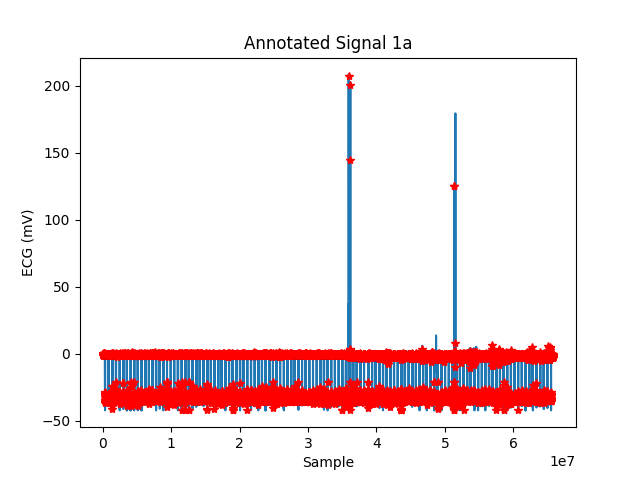

In [11]:
print(virtual_memory())
fig = wfdb.plot_items(signal=signal[lo:hi], ann_samp=[sample_rpeaks], return_fig=True)
plt.title("Annotated Signal 1a")
plt.xlabel("Sample")
plt.ylabel("ECG (mV)")
plt.show(fig)
#plt.close(fig)
#del fig
#collect_garbage()
#print(virtual_memory())

In [7]:
files = sorted([file.name for file in scandir(folder)])
while files[0] != "raw_waves_data_7b.csv":
    files.pop(0)

In [8]:
files

['raw_waves_data_7b.csv',
 'raw_waves_data_7c.csv',
 'raw_waves_data_7d.csv',
 'raw_waves_data_7e.csv']

In [9]:
for file in files:
    print("Now plotting for file " + namedict[file])
    print(virtual_memory())

    # Load in the ECG signal
    cols = coldict[file]

    df = pd.read_csv(folder + file, usecols=cols)
    signal = pd.Series(df[cols[1]]) # Column 0 is the time
    i=2
    while True:
        try:
            signal = signal.combine_first(df[cols[i]])
            i+=1
        except IndexError:
            break
    signal = signal.fillna(0)

    signal = np.array(signal).reshape(len(signal), 1)

    del df
    collect_garbage()

    # Load in the rpeaks
    rpeaks = pd.read_csv("try_again/rpeaks_" + namedict[file] + ".csv")
    rpeaks.columns = ["sample", "time"]
    del rpeaks["time"]
    collect_garbage()

    # Make plot
    fig = wfdb.plot_items(signal=signal, ann_samp=[rpeaks], return_fig=True)
    plt.title("Annotated Signal " + namedict[file])
    plt.xlabel("Sample")
    plt.ylabel("ECG (mV)")
    plt.savefig( "annotated_signal_" + namedict[file] + ".jpg", dpi=300, bbox_inches="tight")
    plt.close(fig)
    del fig
    del rpeaks
    collect_garbage()

    print(virtual_memory())

    

    
    

Now plotting for file 7b
svmem(total=12655771648, available=6268657664, percent=50.5, used=6387113984, free=6268657664)
svmem(total=12655771648, available=2235224064, percent=82.3, used=10420547584, free=2235224064)
Now plotting for file 7c
svmem(total=12655771648, available=2235219968, percent=82.3, used=10420551680, free=2235219968)
svmem(total=12655771648, available=3096838144, percent=75.5, used=9558933504, free=3096838144)
Now plotting for file 7d
svmem(total=12655771648, available=3096825856, percent=75.5, used=9558945792, free=3096825856)
svmem(total=12655771648, available=2460889088, percent=80.6, used=10194882560, free=2460889088)
Now plotting for file 7e
svmem(total=12655771648, available=2460876800, percent=80.6, used=10194894848, free=2460876800)
svmem(total=12655771648, available=1612767232, percent=87.3, used=11043004416, free=1612767232)


In [9]:
virtual_memory()

svmem(total=12655771648, available=7161901056, percent=43.4, used=5493870592, free=7161901056)